In [30]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('C:\\Users\\parag.datir\\Desktop\\Python-Practi\\Test22N.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [31]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [32]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/100
 - 3s - loss: 0.0313
Epoch 2/100
 - 1s - loss: 0.0261
Epoch 3/100
 - 1s - loss: 0.0270
Epoch 4/100
 - 1s - loss: 0.0272
Epoch 5/100
 - 1s - loss: 0.0265
Epoch 6/100
 - 1s - loss: 0.0258
Epoch 7/100
 - 1s - loss: 0.0251
Epoch 8/100
 - 1s - loss: 0.0264
Epoch 9/100
 - 1s - loss: 0.0262
Epoch 10/100
 - 1s - loss: 0.0255
Epoch 11/100
 - 1s - loss: 0.0259
Epoch 12/100
 - 1s - loss: 0.0260
Epoch 13/100
 - 1s - loss: 0.0257
Epoch 14/100
 - 1s - loss: 0.0259
Epoch 15/100
 - 1s - loss: 0.0265
Epoch 16/100
 - 1s - loss: 0.0261
Epoch 17/100
 - 1s - loss: 0.0260
Epoch 18/100
 - 1s - loss: 0.0255
Epoch 19/100
 - 1s - loss: 0.0252
Epoch 20/100
 - 1s - loss: 0.0250
Epoch 21/100
 - 1s - loss: 0.0259
Epoch 22/100
 - 1s - loss: 0.0262
Epoch 23/100
 - 1s - loss: 0.0261
Epoch 24/100
 - 1s - loss: 0.0253
Epoch 25/100
 - 1s - loss: 0.0252
Epoch 26/100
 - 1s - loss: 0.0255
Epoch 27/100
 - 1s - loss: 0.0251
Epoch 28/100
 - 1s - loss: 0.0262
Epoch 29/100
 - 1s - loss: 0.0258
Epoch 30/100
 - 1s - lo

In [33]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 433.20 RMSE
Test Score: 719.25 RMSE


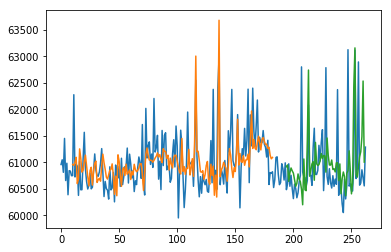

In [34]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
Actual_Test = numpy.array(testY).round()
Actual_Test 

array([[60483., 60595., 60970., 60547., 60754., 60506., 60314., 60587.,
        60506., 60330., 60423., 60633., 60752., 62798., 60815., 60725.,
        60709., 60544., 60656., 62081., 60755., 60753., 60564., 61275.,
        61641., 60771., 60769., 60844., 61319., 61023., 61373., 61614.,
        60465., 60963., 62783., 60733., 60582., 60878., 60615., 60514.,
        60746., 60545., 60681., 60584., 62369., 60377., 60784., 60518.,
        60212., 60051., 60684., 60308., 60561., 63122., 60550., 60594.,
        60454., 60459., 60962., 63113., 60692., 60877., 62891., 60568.,
        60607., 60857., 60700., 60554.]])

In [36]:
import pandas as pd
df = pd.DataFrame(Actual_Test)
df = df.T
df.columns = ['Actual_Test']
df = df.astype(int)
df

,Actual_Test
0,60483
1,60595
2,60970
3,60547
4,60754
5,60506
6,60314
7,60587
8,60506
9,60330


In [37]:
Predict_Test = numpy.array(testPredict).round()


In [38]:
df1 = pd.DataFrame(Predict_Test)
df1.columns = ['Predict_Test']
df1 = df1.astype(int)
df1

,Predict_Test
0,60915
1,60949
2,60640
3,60802
4,60892
5,60838
6,60794
7,60668
8,60544
9,60601


In [39]:
test_predict= pd.concat([df, df1], axis=1)
test_predict

,Actual_Test,Predict_Test
0,60483,60915
1,60595,60949
2,60970,60640
3,60547,60802
4,60754,60892
5,60506,60838
6,60314,60794
7,60587,60668
8,60506,60544
9,60330,60601


In [40]:
dataset.shape

(263, 1)

In [41]:
testX1 = dataset[250:263,:]
testX1

array([[0.15888977],
       [0.16046715],
       [0.3190422 ],
       [0.99716187],
       [0.23392105],
       [0.29224396],
       [0.9271755 ],
       [0.19482994],
       [0.20712471],
       [0.28594017],
       [0.23644447],
       [0.19041634],
       [0.42086983]], dtype=float32)

In [42]:
# split into train and test sets
#train_size = int(len(dataset))
#test_size = len(dataset) - train_size
train1 = dataset[240:263,:]
# reshape into X=t and Y=t+1
look_back = 10
trainX1, trainY1 = create_dataset(train1, look_back)
#testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX1 = numpy.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 1))
#testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
#model = Sequential()
#model.add(LSTM(4, input_shape=(look_back, 1)))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict1 = model.predict(trainX1)
#testPredict = model.predict(testX)
# invert predictions
trainPredict1 = scaler.inverse_transform(trainPredict1)
trainY1 = scaler.inverse_transform([trainY1])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting

In [43]:
trainPredict1

array([[60403.93 ],
       [60609.676],
       [62410.09 ],
       [63156.094],
       [60772.863],
       [60718.54 ],
       [60908.027],
       [61100.31 ],
       [61198.95 ],
       [61483.965],
       [62531.133],
       [61002.41 ]], dtype=float32)

In [44]:
trainY1 = pd.DataFrame(trainY1)
trainY1 = trainY1.T
trainY1.columns = ['Future_Prediction']
trainY1 = trainY1.astype(int)
trainY1.index = trainY1.index + 264
trainY1

,Future_Prediction
264,60453
265,60459
266,60962
267,63112
268,60691
269,60876
270,62891
271,60568
272,60606
273,60857


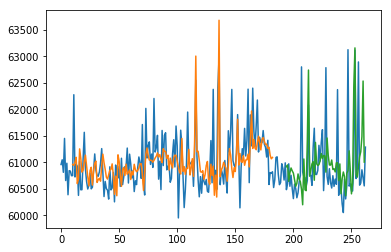

In [45]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

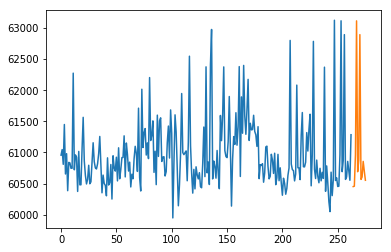

In [46]:
trainPredictPlot = numpy.empty_like(dataset[240:263,:])
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot = trainY1
# shift test predictions for plotting
#testPredictPlot = numpy.empty_like(dataset[240:263,:])
#testPredictPlot[:, :] = numpy.nan
#trainPredictPlot[len(trainPredict1)+(look_back*2)+1:len(dataset)-1, :] = trainY1
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()

In [70]:
test_predict.to_excel('C:\\Users\\parag.datir\\Desktop\\Python-Practi\\test.xlsx', sheet_name='sheet1', index=False)